# Introduction to Text Mining and Natural Language Processing

## Sentiment Analysis and Sentiment Modellinf for Amazon Reviews

In [2]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 6.8 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 3.2 MB/s eta 0:00:00a 0:00:01


In [40]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import re
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Text Preprocessing

In [25]:
df = pd.read_csv("./datasets/amazon_reviews.csv", sep=",")

In [26]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [27]:
# Normalizing Case Folding
df['reviewText'] = df['reviewText'].str.lower()

In [46]:
# Remove Punctuations
df['reviewText'] = df['reviewText'].fillna('')
df['reviewText'] = df['reviewText'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [53]:
# Remove Numbers
# Like emojies
df['reviewText'] = df['reviewText'].fillna('').apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [55]:
# Remove Stop Words
# Ölçümsel olarak bir şey ifade etmeyen dilde çok kullanılan kelimeler
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hunkargencyildiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in sw))

In [60]:
# Remove Rare Words
# Nadir kelimelerin çıkarılması
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

In [61]:
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
lowdown          1
outmoded         1
stocking         1
cardsso          1
stealwould       1
Name: count, Length: 9697, dtype: int64

In [62]:
drops = temp_df[temp_df <= 1]

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [64]:
# Tokenization
# Parçalarına ayır
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hunkargencyildiz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
df['reviewText'] = df['reviewText'].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

In [67]:
# Lemmatization
# Köklerine indirgeme
nltk.download('wordnet')
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hunkargencyildiz/nltk_data...


### Text Visualization

In [72]:
# Terim Frekanslarının Hesaplanması
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [73]:
tf.columns = ["words", "tf"]

In [74]:
tf.sort_values("tf", ascending=False)

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2721,sizethe,2.00
2719,everybody,2.00
2717,lived,2.00
3687,chkdsk,2.00


In [75]:
# Barplot
tf[tf["tf"] > 500]

,words,tf
0,issue,609.00
2,device,584.00
7,phone,1909.00
8,memory,1378.00
14,work,2044.00
26,note,514.00
27,card,5537.00
33,well,677.00
36,one,1120.00
39,gb,1756.00


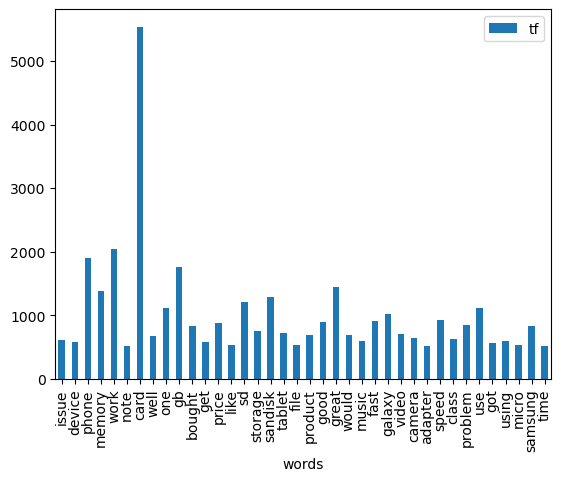

In [78]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf");

In [79]:
# Word Cloud
text = " ".join(i for i in df.reviewText)

In [81]:
wordcloud = WordCloud().generate(text)
wordcloud

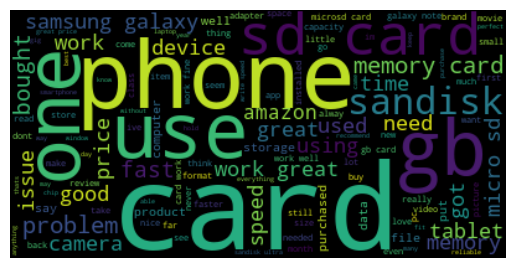

In [82]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

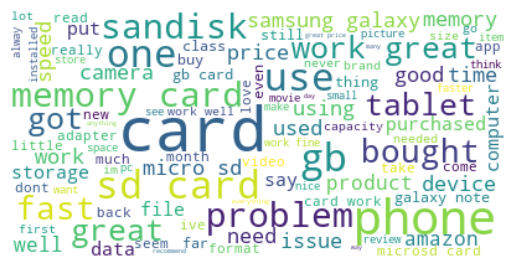

In [83]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

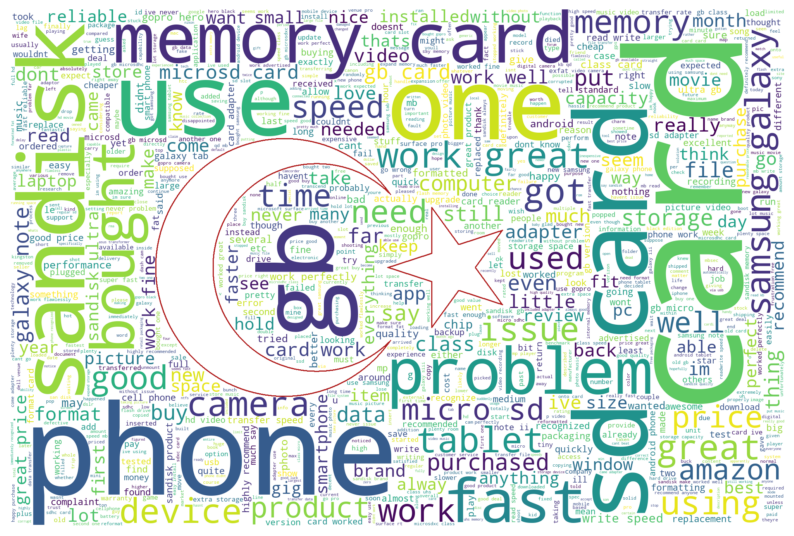

In [85]:
# Template Word Cloud
nlp_mask = np.array(Image.open("tr.png"))

wc = WordCloud(background_color="white",
               max_words=1000,
               mask=nlp_mask,
               contour_width=3,
               contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Sentiment Anaysis

In [86]:
df["reviewText"].head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit envelope...
Name: reviewText, dtype: object

In [87]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hunkargencyildiz/nltk_data...


True

In [88]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [89]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [90]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [91]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [92]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86


### Feature Engineering

In [93]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [94]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [95]:
df["sentiment_label"].value_counts()

sentiment_label
pos    3944
neg     971
Name: count, dtype: int64

In [96]:
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [97]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [98]:
y = df["sentiment_label"]
X = df["reviewText"]

In [99]:
y

0       0
1       0
2       1
3       1
4       1
       ..
4910    1
4911    1
4912    1
4913    1
4914    1
Name: sentiment_label, Length: 4915, dtype: int64

In [100]:
X

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

In [101]:
# Count Vectors: frekans temsiller
# TF-IDF Vectors: normalize edilmiş frekans temsiller
# Word Embeddings (Word2Vec, GloVe, BERT vs)

In [102]:
# words
# kelimelerin nümerik temsilleri

# characters
# karakterlerin numerik temsilleri

# ngram
a = """Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinden göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir ve feature üretmek için kullanılır"""

TextBlob(a).ngrams(3)

[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinden']),
 WordList(['metin', 'üzerinden', 'göstereceğim']),
 WordList(['üzerinden', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyolarını']),
 WordList(['kelimelerin', 'kombinasyolarını', 'gösterir']),
 WordList(['kombinasyolarını', 'gösterir', 've']),
 WordList(['gösterir', 've', 'feature']),
 WordList(['ve', 'feature', 'üretmek']),
 WordList(['feature', 'üretmek', 'için']),
 WordList(['üretmek', 'için', 'kullanılır'])]

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

# word frekans
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [108]:
# n-gram frekans
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()
X_n.toarray()


vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names_out()[10:15]
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
# Apply out data
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

In [111]:
vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [112]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [117]:
# TF-IDF Method (standardization)
# Adım 1: Count Vectorizer hesapla (Kelimelerin her bir dokümandaki frekansı)
# Eşsiz tüm terimlerin sütunlara, bütün cümleleri(dokümanları) satırlara yerleştir.
# Terimlerin Dokümanlarda geçme frekansları hücrelere yerleştirilir.
# Adım 2: TF (Term Frequency'yi hesapla)
# t teriminin ilgili dokümandaki frekansı / dokümandaki toplam terim sayısı
# Adım 3: IDF (Inverse Document Frequency'i Hesapla)
# 1 + loge((toplam doküman sayısı +1) / içinde t terimi olan doküman sayısı + 1)
# Adım 4: TF * IDF Hesapla
# Adım 5: L2 Normalizasyonu Yap
# Satırların kareleri toplamının karekökünü bul, ilgili satırlardaki tüm hücreleri bulduğun değere böl
from sklearn.feature_extraction.text import TfidfVectorizer

In [118]:
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [119]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

### Sentiment Modelling

In [120]:
# Logistic Regression

log_model = LogisticRegression().fit(X_tf_idf_word, y)

In [121]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.830111902339776

In [127]:
# new_review = pd.Series("this product is great")
# new_review = pd.Series("look at that shit very bad")
new_review = pd.Series("it was good but I am sure that it fits me")

new_review = TfidfVectorizer().fit(X).transform(new_review)
new_review

<1x3665 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [128]:
log_model.predict(new_review)

array([1])

In [131]:
random_review = pd.Series(df["reviewText"].sample(1).values)
random_review.values

array(['bought memory card day received samsung galaxy arrived two day via prime plugged formatted offer gb usable space card class read super fast writes great uhs sadly mostly supported dslrs smartphones device wont take advantage super super speed nonetheless card card lot storage affordable transfer read fast id recommend people carry lot medium music video'],
      dtype=object)

In [132]:
new_review = TfidfVectorizer().fit(X).transform(random_review)

log_model.predict(new_review)

array([1])

In [133]:
# Random Forests

In [134]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8427263479145474

In [135]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8260427263479146

In [136]:
# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.7884028484231943

In [137]:
# Optimization
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

rf_best_grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 200}

In [138]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

In [139]:
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.8118006103763988